# Perceptron, Average Perceptron and Pegasos
> "Implementation of Supervised Learning Algorithms - Perceptron, Average Perceptron, and Pegasos - in pure python code"

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [notebook, project, python]
- image: images/vignette/db.png
- hide: false
- search_exclude: true

# Abstract
The goal of this project is to write three Supervised Learning Algorithms - Perceptron, Average Perceptron, and Pegasos - in pure python code. I'll use `numpy` for handling and creating numerical arrays. The parameter estimation is done through `Stochastic Gradient Descent` algorithm.

In [2]:
import numpy as np

# Test Cases
I've created some test cases for each algorithm that I'll be writing, to test the correctness of the algorithm.
e.g. 
`check_get_order()`
`check_hinge_loss_single()`
`check_hinge_loss_full()`

In [3]:
import os
import sys
import time
import traceback
import numpy as np
from Review_Analyzer import get_order

verbose = False

def green(s):
    return '\033[1;32m%s\033[m' % s

def yellow(s):
    return '\033[1;33m%s\033[m' % s

def red(s):
    return '\033[1;31m%s\033[m' % s

def log(*m):
    print(" ".join(map(str, m)))

def log_exit(*m):
    log(red("ERROR:"), *m)
    exit(1)


def check_real(ex_name, f, exp_res, *args):
    try:
        res = f(*args)
    except NotImplementedError:
        log(red("FAIL"), ex_name, ": not implemented")
        return True
    if not np.isreal(res):
        log(red("FAIL"), ex_name, ": does not return a real number, type: ", type(res))
        return True
    if res != exp_res:
        log(red("FAIL"), ex_name, ": incorrect answer. Expected", exp_res, ", got: ", res)
        return True


def equals(x, y):
    if type(y) == np.ndarray:
        return (x == y).all()
    return x == y

def check_tuple(ex_name, f, exp_res, *args, **kwargs):
    try:
        res = f(*args, **kwargs)
    except NotImplementedError:
        log(red("FAIL"), ex_name, ": not implemented")
        return True
    if not type(res) == tuple:
        log(red("FAIL"), ex_name, ": does not return a tuple, type: ", type(res))
        return True
    if not len(res) == len(exp_res):
        log(red("FAIL"), ex_name, ": expected a tuple of size ", len(exp_res), " but got tuple of size", len(res))
        return True
    if not all(equals(x, y) for x, y in zip(res, exp_res)):
        log(red("FAIL"), ex_name, ": incorrect answer. Expected", exp_res, ", got: ", res)
        return True

def check_array(ex_name, f, exp_res, *args):
    try:
        res = f(*args)
    except NotImplementedError:
        log(red("FAIL"), ex_name, ": not implemented")
        return True
    if not type(res) == np.ndarray:
        log(red("FAIL"), ex_name, ": does not return a numpy array, type: ", type(res))
        return True
    if not len(res) == len(exp_res):
        log(red("FAIL"), ex_name, ": expected an array of shape ", exp_res.shape, " but got array of shape", res.shape)
        return True
    if not all(equals(x, y) for x, y in zip(res, exp_res)):
        log(red("FAIL"), ex_name, ": incorrect answer. Expected", exp_res, ", got: ", res)
        return True

def check_list(ex_name, f, exp_res, *args):
    try:
        res = f(*args)
    except NotImplementedError:
        log(red("FAIL"), ex_name, ": not implemented")
        return True
    if not type(res) == list:
        log(red("FAIL"), ex_name, ": does not return a list, type: ", type(res))
        return True
    if not len(res) == len(exp_res):
        log(red("FAIL"), ex_name, ": expected a list of size ", len(exp_res), " but got list of size", len(res))
        return True
    if not all(equals(x, y) for x, y in zip(res, exp_res)):
        log(red("FAIL"), ex_name, ": incorrect answer. Expected", exp_res, ", got: ", res)
        return True


def check_get_order():
    ex_name = "Get order"
    if check_list(
            ex_name, get_order,
            [0], 1):
        log("You should revert `get_order` to its original implementation for this test to pass")
        return
    if check_list(
            ex_name, get_order,
            [1, 0], 2):
        log("You should revert `get_order` to its original implementation for this test to pass")
        return
    log(green("PASS"), ex_name, "")


def check_hinge_loss_single():
    ex_name = "Hinge loss single"

    feature_vector = np.array([1, 2])
    label, theta, theta_0 = 1, np.array([-1, 1]), -0.2
    exp_res = 1 - 0.8
    if check_real(
            ex_name, hinge_loss_single,
            exp_res, feature_vector, label, theta, theta_0):
        return
    log(green("PASS"), ex_name, "")


def check_hinge_loss_full():
    ex_name = "Hinge loss full"

    feature_vector = np.array([[1, 2], [1, 2]])
    label, theta, theta_0 = np.array([1, 1]), np.array([-1, 1]), -0.2
    exp_res = 1 - 0.8
    if check_real(
            ex_name, hinge_loss_full,
            exp_res, feature_vector, label, theta, theta_0):
        return

    log(green("PASS"), ex_name, "")


def check_perceptron_single_update():
    ex_name = "Perceptron single update"

    feature_vector = np.array([1, 2])
    label, theta, theta_0 = 1, np.array([-1, 1]), -1.5
    exp_res = (np.array([0, 3]), -0.5)
    if check_tuple(
            ex_name, perceptron_single_step_update,
            exp_res, feature_vector, label, theta, theta_0):
        return

    feature_vector = np.array([1, 2])
    label, theta, theta_0 = 1, np.array([-1, 1]), -1
    exp_res = (np.array([0, 3]), 0)
    if check_tuple(
            ex_name + " (boundary case)", perceptron_single_step_update,
            exp_res, feature_vector, label, theta, theta_0):
        return

    log(green("PASS"), ex_name, "")


def check_perceptron():
    ex_name = "Perceptron"

    feature_matrix = np.array([[1, 2]])
    labels = np.array([1])
    T = 1
    exp_res = (np.array([1, 2]), 1)
    if check_tuple(
            ex_name, perceptron,
            exp_res, feature_matrix, labels, T):
        return

    feature_matrix = np.array([[1, 2], [-1, 0]])
    labels = np.array([1, 1])
    T = 1
    exp_res = (np.array([0, 2]), 2)
    if check_tuple(
            ex_name, perceptron,
            exp_res, feature_matrix, labels, T):
        return

    feature_matrix = np.array([[1, 2]])
    labels = np.array([1])
    T = 2
    exp_res = (np.array([1, 2]), 1)
    if check_tuple(
            ex_name, perceptron,
            exp_res, feature_matrix, labels, T):
        return

    feature_matrix = np.array([[1, 2], [-1, 0]])
    labels = np.array([1, 1])
    T = 2
    exp_res = (np.array([0, 2]), 2)
    if check_tuple(
            ex_name, perceptron,
            exp_res, feature_matrix, labels, T):
        return

    log(green("PASS"), ex_name, "")


def check_average_perceptron():
    ex_name = "Average perceptron"

    feature_matrix = np.array([[1, 2]])
    labels = np.array([1])
    T = 1
    exp_res = (np.array([1, 2]), 1)
    if check_tuple(
            ex_name, average_perceptron,
            exp_res, feature_matrix, labels, T):
        return

    feature_matrix = np.array([[1, 2], [-1, 0]])
    labels = np.array([1, 1])
    T = 1
    exp_res = (np.array([-0.5, 1]), 1.5)
    if check_tuple(
            ex_name, average_perceptron,
            exp_res, feature_matrix, labels, T):
        return

    feature_matrix = np.array([[1, 2]])
    labels = np.array([1])
    T = 2
    exp_res = (np.array([1, 2]), 1)
    if check_tuple(
            ex_name, average_perceptron,
            exp_res, feature_matrix, labels, T):
        return

    feature_matrix = np.array([[1, 2], [-1, 0]])
    labels = np.array([1, 1])
    T = 2
    exp_res = (np.array([-0.25, 1.5]), 1.75)
    if check_tuple(
            ex_name, average_perceptron,
            exp_res, feature_matrix, labels, T):
        return

    log(green("PASS"), ex_name, "")


def check_pegasos_single_update():
    ex_name = "Pegasos single update"

    feature_vector = np.array([1, 2])
    label, theta, theta_0 = 1, np.array([-1, 1]), -1.5
    L = 0.2
    eta = 0.1
    exp_res = (np.array([-0.88, 1.18]), -1.4)
    if check_tuple(
            ex_name, pegasos_single_step_update,
            exp_res,
            feature_vector, label, L, eta, theta, theta_0):
        return

    feature_vector = np.array([1, 1])
    label, theta, theta_0 = 1, np.array([-1, 1]), 1
    L = 0.2
    eta = 0.1
    exp_res = (np.array([-0.88, 1.08]), 1.1)
    if check_tuple(
            ex_name +  " (boundary case)", pegasos_single_step_update,
            exp_res,
            feature_vector, label, L, eta, theta, theta_0):
        return

    feature_vector = np.array([1, 2])
    label, theta, theta_0 = 1, np.array([-1, 1]), -2
    L = 0.2
    eta = 0.1
    exp_res = (np.array([-0.88, 1.18]), -1.9)
    if check_tuple(
            ex_name, pegasos_single_step_update,
            exp_res,
            feature_vector, label, L, eta, theta, theta_0):
        return

    log(green("PASS"), ex_name, "")


def check_pegasos():
    ex_name = "Pegasos"

    feature_matrix = np.array([[1, 2]])
    labels = np.array([1])
    T = 1
    L = 0.2
    exp_res = (np.array([1, 2]), 1)
    if check_tuple(
            ex_name, pegasos,
            exp_res, feature_matrix, labels, T, L):
        return

    feature_matrix = np.array([[1, 1], [1, 1]])
    labels = np.array([1, 1])
    T = 1
    L = 1
    exp_res = (np.array([1-1/np.sqrt(2), 1-1/np.sqrt(2)]), 1)
    if check_tuple(
            ex_name, pegasos,
            exp_res, feature_matrix, labels, T, L):
        return

    log(green("PASS"), ex_name, "")


def check_classify():
    ex_name = "Classify"

    feature_matrix = np.array([[1, 1], [1, 1], [1, 1]])
    theta = np.array([1, 1])
    theta_0 = 0
    exp_res = np.array([1, 1, 1])
    if check_array(
            ex_name, classify,
            exp_res, feature_matrix, theta, theta_0):
        return

    feature_matrix = np.array([[-1, 1]])
    theta = np.array([1, 1])
    theta_0 = 0
    exp_res = np.array([-1])
    if check_array(
            ex_name + " (boundary case)", classify,
            exp_res, feature_matrix, theta, theta_0):
        return

    log(green("PASS"), ex_name, "")

def check_classifier_accuracy():
    ex_name = "Classifier accuracy"

    train_feature_matrix = np.array([[1, 0], [1, -1], [2, 3]])
    val_feature_matrix = np.array([[1, 1], [2, -1]])
    train_labels = np.array([1, -1, 1])
    val_labels = np.array([-1, 1])
    exp_res = 1, 0
    T=1
    if check_tuple(
            ex_name, classifier_accuracy,
            exp_res,
            perceptron,
            train_feature_matrix, val_feature_matrix,
            train_labels, val_labels,
            T=T):
        return

    train_feature_matrix = np.array([[1, 0], [1, -1], [2, 3]])
    val_feature_matrix = np.array([[1, 1], [2, -1]])
    train_labels = np.array([1, -1, 1])
    val_labels = np.array([-1, 1])
    exp_res = 1, 0
    T=1
    L=0.2
    if check_tuple(
            ex_name, classifier_accuracy,
            exp_res,
            pegasos,
            train_feature_matrix, val_feature_matrix,
            train_labels, val_labels,
            T=T, L=L):
        return

    log(green("PASS"), ex_name, "")

def check_bag_of_words():
    ex_name = "Bag of words"

    texts = [
        "He loves to walk on the beach",
        "There is nothing better"]

    try:
        res = bag_of_words(texts)
    except NotImplementedError:
        log(red("FAIL"), ex_name, ": not implemented")
        return
    if not type(res) == dict:
        log(red("FAIL"), ex_name, ": does not return a tuple, type: ", type(res))
        return

    vals = sorted(res.values())
    exp_vals = list(range(len(res.keys())))
    if not vals == exp_vals:
        log(red("FAIL"), ex_name, ": wrong set of indices. Expected: ", exp_vals, " got ", vals)
        return

    log(green("PASS"), ex_name, "")

    keys = sorted(res.keys())
    exp_keys = ['beach', 'better', 'he', 'is', 'loves', 'nothing', 'on', 'the', 'there', 'to', 'walk']
    stop_keys = ['beach', 'better', 'loves', 'nothing', 'walk']

    if keys == exp_keys:
        log(yellow("WARN"), ex_name, ": does not remove stopwords:", [k for k in keys if k not in stop_keys])
    elif keys == stop_keys:
        log(green("PASS"), ex_name, " stopwords removed")
    else:
        log(red("FAIL"), ex_name, ": keys are missing:", [k for k in stop_keys if k not in keys], " or are not unexpected:", [k for k in keys if k not in stop_keys])


def check_extract_bow_feature_vectors():
    ex_name = "Extract bow feature vectors"
    texts = [
        "He loves her ",
        "He really really loves her"]
    keys = ["he", "loves", "her", "really"]
    dictionary = {k:i for i, k in enumerate(keys)}
    exp_res = np.array(
        [[1, 1, 1, 0],
        [1, 1, 1, 1]])
    non_bin_res = np.array(
        [[1, 1, 1, 0],
        [1, 1, 1, 2]])


    try:
        res = extract_bow_feature_vectors(texts, dictionary)
    except NotImplementedError:
        log(red("FAIL"), ex_name, ": not implemented")
        return

    if not type(res) == np.ndarray:
        log(red("FAIL"), ex_name, ": does not return a numpy array, type: ", type(res))
        return
    if not len(res) == len(exp_res):
        log(red("FAIL"), ex_name, ": expected an array of shape ", exp_res.shape, " but got array of shape", res.shape)
        return

    log(green("PASS"), ex_name)

    if (res == exp_res).all():
        log(yellow("WARN"), ex_name, ": uses binary indicators as features")
    elif (res == non_bin_res).all():
        log(green("PASS"), ex_name, ": correct non binary features")
    else:
        log(red("FAIL"), ex_name, ": unexpected feature matrix")
        return

def main():
    log(green("PASS"), "Import Review-Analyzer")
    try:
        check_get_order()
        check_hinge_loss_single()
        check_hinge_loss_full()
        check_perceptron_single_update()
        check_perceptron()
        check_average_perceptron()
        check_pegasos_single_update()
        check_pegasos()
        check_classify()
        check_classifier_accuracy()
        check_bag_of_words()
        check_extract_bow_feature_vectors()
    except Exception:
        log_exit(traceback.format_exc())

# Algorithms

## Hinge Loss
HINGE_LOSS ($\{(\ x^{(i)},\ y^{(i)}: i = 1.....n\ )\}$, $\theta$, $\theta_0$): <br />
&emsp;loss $\gets$ 0 <br />
&emsp;for i $\gets$ 1....n: <br />
&emsp;&emsp;$z$ $\gets$ $ y^{(i)} (\theta . x^{(i)} + \theta_0 ) $ <br />
&emsp;&emsp;$loss\ \gets loss + max(0, 1 - z)$ <br />
&emsp;return $loss \div n$ <br />

In [4]:
def hinge_loss_single(feature_vector, label, theta, theta_0):
    y = theta @ feature_vector + theta_0
    return np.maximum(0, 1 - y * label)

In [5]:
def hinge_loss_full(feature_matrix, labels, theta, theta_0):
    loss = 0
    for i in range(len(labels)):
        loss += hinge_loss_single(feature_matrix[i], labels[i], theta, theta_0)
    return loss / len(labels)

## 1. Perceptron

For `perceptron` algorithm, I'll use `0-1 loss` for simplicity. <br />
Algo takes `feature matrix`, `T` - no. of times to run the algo on the given data, `labels` as input and returns estimated $\theta$ $\And$ $\theta_0$ <br />

Proof for perceptron update: <br />
Loss function(for a particular sample $\{x^i, y^i\}$): <br />
Aggrement: $ z =  y^i*(x^i.\theta + \theta_0)$, Learning rate: $\eta$

$\hat{E}(\{x^i, y^i\}, \theta, \theta_0) = \begin{cases}
                                            0,\ \ \ \ \ \ \ \ \ \ \ \text{ if } z >0 \\
                                            1-z,\ \ \ \ \text{  otherwise}
                                            \end{cases}$

$ \nabla_\theta\hat{E} = \begin{cases}
                        0,\ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{if } \hat{E} = 0\\
                        -y^i*x^i,\ \ \ \ \text{otherwise}
                        \end{cases} $ <br />
                        
$\nabla_{\theta_0}\hat{E} = \begin{cases}
                        0,\ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{if } \hat{E} = 0\\
                        -y^i,\ \ \ \ \text{otherwise}
                        \end{cases}$ <br />
therefore the gradient descent update will be: <br />
$\theta \gets \theta + \eta . y^i x^i$ <br />
$\theta_0 \gets \theta_0 + y^i$

PERCEPTRON ($\{(\ x^{(i)},\ y^{(i)}: i = 1.....n\ )\}$, T): <br />
&emsp; $\theta \gets 0 \ vector$<br />
&emsp; $\theta_0 \gets 0.0$ <br />
&emsp; for t $\gets$ 1....T: <br />
&emsp;&emsp; Randomly shuffle indices <br />
&emsp;&emsp; for i in indices: <br />
&emsp;&emsp;&emsp; if $ y^{(i)} (\theta . x^{(i)} + \theta_0 ) \eqslantless 0 $: <br />
&emsp;&emsp;&emsp;&emsp; $\theta \gets \theta + y^{(i)} . x^{(i)}$ <br />
&emsp;&emsp;&emsp;&emsp; $\theta_0 \gets \theta_0 + y^{(i)}$ <br />


In [6]:
def perceptron_single_step_update(
        feature_vector,
        label,
        current_theta,
        current_theta_0):
    if label * (np.dot(current_theta, feature_vector) + current_theta_0) <= 1e-7:
        current_theta += label * feature_vector
        current_theta_0 += label
    return current_theta, current_theta_0

In [7]:
def perceptron(feature_matrix, labels, T):
    import random
    random.seed(1)
    nsamples, nfeatures = feature_matrix.shape
    theta = np.zeros(nfeatures)
    theta_0 = 0.0
    for t in range(T):
        indices = list(range(nsamples))
        random.shuffle(indices)
        for i in indices:
            theta, theta_0 = perceptron_single_step_update(feature_matrix[i], labels[i], theta, theta_0)
    return theta, theta_0

## 2. Average Perceptron
The Average Perceptron algorithm gives better results than the simple Perceptron algorithm in most of the cases. <br />
Average Perceptron is analogous to the simple Perceptron except that we also need to keep track of the sum of $\theta$'s got after each run of the algorithm and then finally return the Average of those. 

In [8]:
def average_perceptron(feature_matrix, labels, T):
    import random
    random.seed(1)
    nsamples, nfeatures = feature_matrix.shape
    theta = np.zeros(nfeatures)
    theta_sum =  np.zeros(nfeatures)
    theta_0 = 0.0
    theta_0_sum = 0.0
    for t in range(T):
        indices = list(range(nsamples))
        random.shuffle(indices)
        for i in indices:
            theta, theta_0 = perceptron_single_step_update(feature_matrix[i], labels[i], theta, theta_0)
            theta_sum += theta
            theta_0_sum += theta_0
    return theta_sum / (nsamples * T), theta_0_sum / (nsamples * T)

## 3. Pegasos

In [9]:
def pegasos_single_step_update(feature_vector, label, L, eta, current_theta,
                               current_theta_0):
    c = 1 - eta * L
    d = eta * label
    if label * (current_theta @ feature_vector + current_theta_0) <= 1:
        return c * current_theta + (d * feature_vector), current_theta_0 + d
    return c * current_theta, current_theta_0

In [10]:
def pegasos(feature_matrix, labels, T, L):
    import random
    random.seed(1)
    nsamples, nfeatures = feature_matrix.shape
    theta = np.zeros(nfeatures)
    theta_0 = 0
    count = 0
    for t in range(T):
        indices = np.array(range(nsamples))
        random.shuffle(indices)
        for i in indices:
            count += 1
            eta = 1 / np.sqrt(count)
            theta, theta_0 = pegasos_single_step_update(
                feature_matrix[i], labels[i], L, eta, theta, theta_0)
    return theta, theta_0

## Testing

In [11]:
check_get_order()
check_hinge_loss_single()
check_hinge_loss_full()
check_perceptron_single_update()
check_perceptron()
check_average_perceptron()
check_pegasos_single_update()
check_pegasos()

PASS Get order 
PASS Hinge loss single 
PASS Hinge loss full 
PASS Perceptron single update 
PASS Perceptron 
PASS Average perceptron 
PASS Pegasos single update 
PASS Pegasos 


# Apply algos on synthetic data

## Generate Synthetic Data

In [12]:
def synth_data_2d(n):
    import numpy as np
    import scipy.stats as ss
    np.random.seed(1)
    positive_data = ss.norm.rvs(loc=(4,5), scale=(1,1), size=(n,2))
    negative_data = ss.norm.rvs(loc=(-2,-2), scale=(1,1), size=(n,2))
    data = np.concatenate((positive_data, negative_data), axis=0)
    class1 = np.repeat(1, positive_data.shape[0])
    class2 = np.repeat(-1, negative_data.shape[0])
    labels = np.concatenate([class1, class2])
    return data, labels

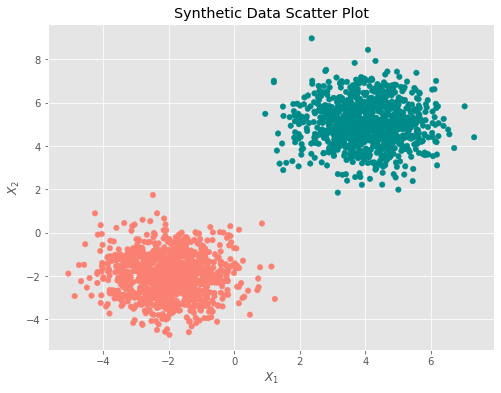

In [24]:
X, y = synth_data_2d(1000)
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use("ggplot")
plt.figure(figsize=(8,6))
colors = ['darkcyan' if label == 1 else 'salmon' for label in y]
plt.scatter(X[:, 0], X[:, 1], s=30, c=colors)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.title("Synthetic Data Scatter Plot")
plt.show()

In [14]:
ap_theta, ap_theta_0 = average_perceptron(X, y, 10)

In [15]:
p_theta, p_theta_0 = perceptron(X, y, 10)

In [16]:
peg_theta, peg_theta_0 = pegasos(X, y, 10, 0.01)

## Decesion Boundaries 

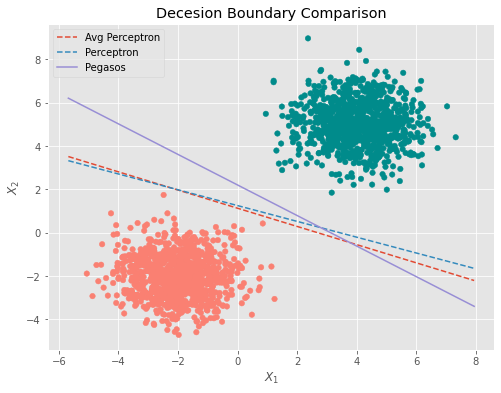

In [25]:
plt.figure(figsize=(8,6))
colors = ['darkcyan' if label == 1 else 'salmon' for label in y]
plt.scatter(X[:, 0], X[:, 1], s=30, c=colors)
xmin, xmax = plt.axis()[:2]

# plot the decision boundary
xs = np.linspace(xmin, xmax)
ap_ys = -(ap_theta[0]*xs + ap_theta_0) / (ap_theta[1] + 1e-16)
p_ys = -(p_theta[0]*xs + p_theta_0) / (p_theta[1] + 1e-16)
peg_ys = -(peg_theta[0]*xs + peg_theta_0) / (peg_theta[1] + 1e-16)
plt.plot(xs, ap_ys, '--', label="Avg Perceptron")
plt.plot(xs, p_ys, '--', label="Perceptron")
plt.plot(xs, peg_ys, '-', label="Pegasos")
plt.legend(loc="upper left")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.title("Decesion Boundary Comparison")
plt.savefig("Plots/decision_boundary.png")
plt.show()

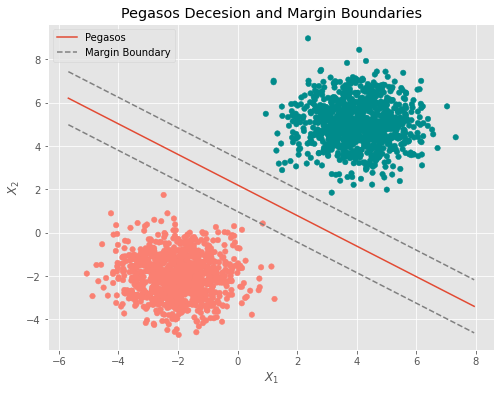

In [26]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use("ggplot")
plt.figure(figsize=(8,6))
colors = ['darkcyan' if label == 1 else 'salmon' for label in y]
plt.scatter(X[:, 0], X[:, 1], s=30, c=colors)
xmin, xmax = plt.axis()[:2]



# plot the decision boundary
xs = np.linspace(xmin, xmax)
ys = -(peg_theta[0]*xs + peg_theta_0) / (peg_theta[1] + 1e-16)
upper_margin = -(peg_theta[0]*xs + peg_theta_0 + np.linalg.norm(peg_theta)) / (peg_theta[1] + 1e-16)
lower_margin = -(peg_theta[0]*xs + peg_theta_0 - np.linalg.norm(peg_theta)) / (peg_theta[1] + 1e-16)
plt.plot(xs, ys, '-', label="Pegasos")
plt.plot(xs, upper_margin,'--', color = "grey", label="Margin Boundary")
plt.plot(xs, lower_margin, '--', color = "grey")
plt.legend(loc="upper left")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.title("Pegasos Decesion and Margin Boundaries")
plt.savefig("Plots/margin_boundary.png")
plt.show()